In [2]:
import pandas as pd

# Load English and German data
df_eng = pd.read_excel("C:/Users/vyache/Downloads/Features_English.xlsx")

# Inspect data
print(df_eng.head())



  Speaker   Recording  F0_sma_de_amean_mean  F0_sma_de_skewness_mean  \
0   Rec 1  SPEAKER_00             -0.000116                 0.020218   
1   Rec 1  SPEAKER_01              0.003280                 0.012920   
2   Rec 2  SPEAKER_00             -0.277711                 0.012998   
3   Rec 2  SPEAKER_01             -0.266140                 0.013187   
4   Rec 3  SPEAKER_00             -0.113114                 0.009421   

   pcm_intensity_sma_amean_mean  pcm_intensity_sma_de_amean_mean  \
0                  3.170397e+00                    -3.863621e-05   
1                  3.884405e+00                    -2.706059e+00   
2                  3.927408e+08                    -2.941868e+07   
3                  3.945613e+09                    -2.819273e+06   
4                  3.934634e+09                    -1.422580e+07   

   pcm_loudness_sma_amean_mean  pcm_loudness_sma_de_amean_mean  \
0                     0.853286                   -3.711688e+01   
1                     0.85

In [4]:
# Convert columns with commas to float
cols_to_convert = ["pcm_intensity_sma_amean_mean", "pcm_intensity_sma_de_amean_mean", "pcm_loudness_sma_amean_mean", "pcm_loudness_sma_de_amean_mean"]

for df in [df_eng]:
    for col in cols_to_convert:
        df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

In [6]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features
feature_cols = df_eng.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

# Apply standardization separately for English
df_eng[feature_cols] = scaler.fit_transform(df_eng[feature_cols])

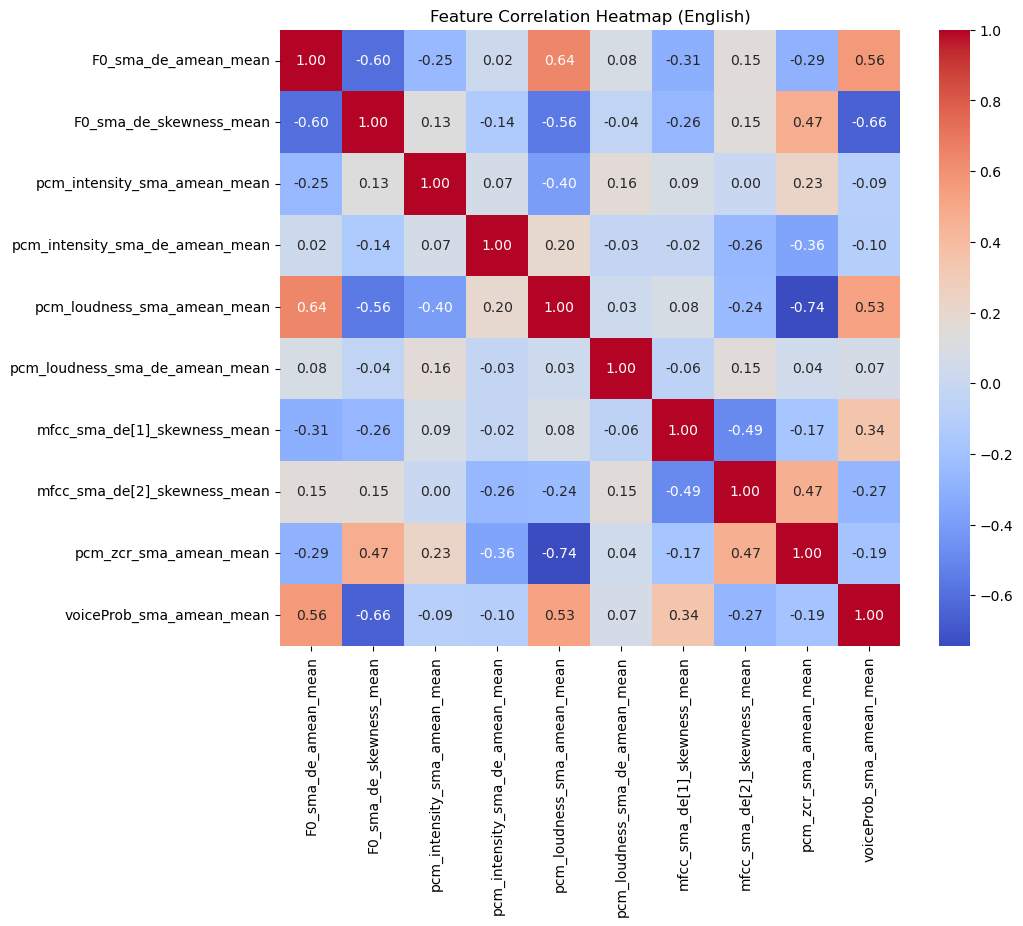

In [7]:
# Select only numeric columns
numeric_cols = df_eng.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix only for numeric columns
correlation_matrix = df_eng[numeric_cols].corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (English)")
plt.show()


In [8]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=5)  # Adjust the number of components as needed
principal_components = pca.fit_transform(df_eng[feature_cols])

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(5)])
print(df_pca.head())

# Check explained variance
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

        PC1       PC2       PC3       PC4       PC5
0 -2.569472 -2.978561  6.073085  1.122593  0.734277
1 -0.663632 -3.303050  3.936218  0.976163 -0.485495
2 -1.433722 -0.936902 -0.534364 -1.378704  0.669603
3 -1.141193 -0.676753  0.924492  0.200124 -0.242685
4 -0.049501 -0.635088 -0.265672 -1.309868 -1.085922
Explained Variance Ratio: [0.33925217 0.18161234 0.13649772 0.11391962 0.08062177]


In [9]:

df_self_reports = pd.read_excel("C:/Users/vyache/Desktop/Questionnaire data_Eng.xlsx")  # Modify filename as needed

# Merge with feature dataset (Ensure the key matches, e.g., 'Recording' and 'Speaker')
df_merged = pd.merge(df_eng, df_self_reports, on=["Recording", "Speaker"])

# Check the merged dataset
print(df_merged.head())

  Speaker   Recording  F0_sma_de_amean_mean  F0_sma_de_skewness_mean  \
0   Rec 1  SPEAKER_00              1.042548                 2.682102   
1   Rec 1  SPEAKER_01              1.061245                 0.733425   
2   Rec 2  SPEAKER_00             -0.485790                 0.754262   
3   Rec 2  SPEAKER_01             -0.422083                 0.804726   
4   Rec 3  SPEAKER_00              0.420424                -0.201034   

   pcm_intensity_sma_amean_mean  pcm_intensity_sma_de_amean_mean  \
0                     -0.671887                         1.280310   
1                     -0.671887                         1.280310   
2                     -0.643493                        -1.776991   
3                     -0.386631                         0.987321   
4                     -0.387425                        -0.198090   

   pcm_loudness_sma_amean_mean  pcm_loudness_sma_de_amean_mean  \
0                     0.507365                       -0.153782   
1                     0.67

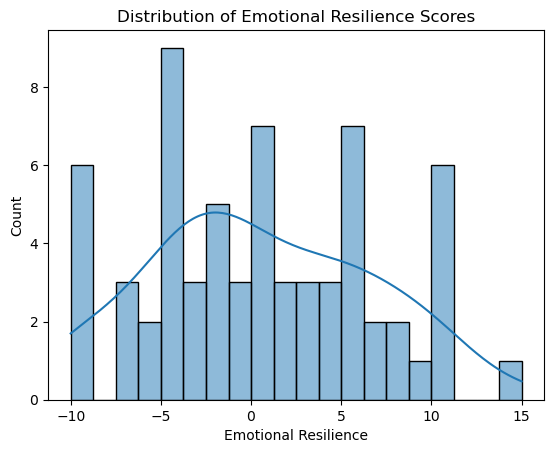

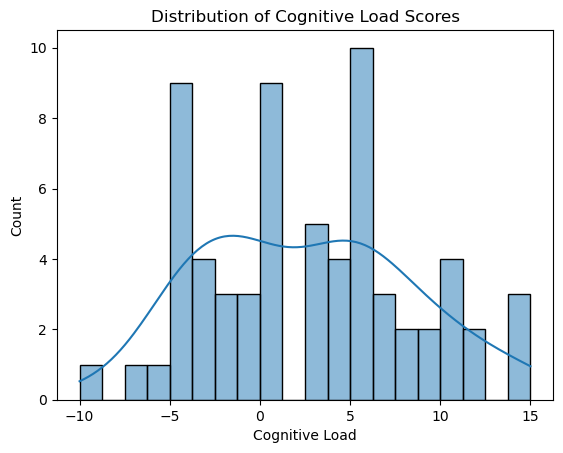

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Emotional Resilience Scores
sns.histplot(df_self_reports["Emotional Resilience"], kde=True, bins=20)
plt.title("Distribution of Emotional Resilience Scores")
plt.show()

# Plot Cognitive Load Scores
sns.histplot(df_self_reports["Cognitive Load"], kde=True, bins=20)
plt.title("Distribution of Cognitive Load Scores")
plt.show()

In [12]:
# Compute median thresholds
resilience_threshold = df_merged["Emotional Resilience"].median()
cognitive_load_threshold = df_merged["Cognitive Load"].median()

# Create binary labels
df_merged["high_resilience"] = (df_merged["Emotional Resilience"] >= resilience_threshold).astype(int)
df_merged["high_cognitive_load"] = (df_merged["Cognitive Load"] >= cognitive_load_threshold).astype(int)

print(df_merged[["Emotional Resilience", "high_resilience"]].head())
print(df_merged[["Cognitive Load", "high_cognitive_load"]].head())

   Emotional Resilience  high_resilience
0                    -3                0
1                     4                1
2                    15                1
3                     5                1
4                     0                1
   Cognitive Load  high_cognitive_load
0               5                    1
1               0                    0
2             -10                    0
3               0                    0
4               4                    1


In [14]:
# Define percentiles
low_threshold_resilience = df_self_reports["Emotional Resilience"].quantile(0.33)
high_threshold_resilience = df_self_reports["Emotional Resilience"].quantile(0.66)

low_threshold_load = df_self_reports["Cognitive Load"].quantile(0.33)
high_threshold_load = df_self_reports["Cognitive Load"].quantile(0.66)

# Categorize into 0 (Low), 1 (Medium), 2 (High)
def categorize_resilience(score):
    if score < low_threshold_resilience:
        return 0  # Low
    elif score < high_threshold_resilience:
        return 1  # Medium
    else:
        return 2  # High

def categorize_cognitive_load(score):
    if score < low_threshold_load:
        return 0  # Low
    elif score < high_threshold_load:
        return 1  # Medium
    else:
        return 2  # High

df_self_reports["resilience_category"] = df_self_reports["Emotional Resilience"].apply(categorize_resilience)
df_self_reports["cognitive_load_category"] = df_self_reports["Cognitive Load"].apply(categorize_cognitive_load)

print(df_self_reports["resilience_category"].value_counts())
print(df_self_reports["cognitive_load_category"].value_counts())


resilience_category
2    25
1    21
0    20
Name: count, dtype: int64
cognitive_load_category
2    26
0    22
1    18
Name: count, dtype: int64


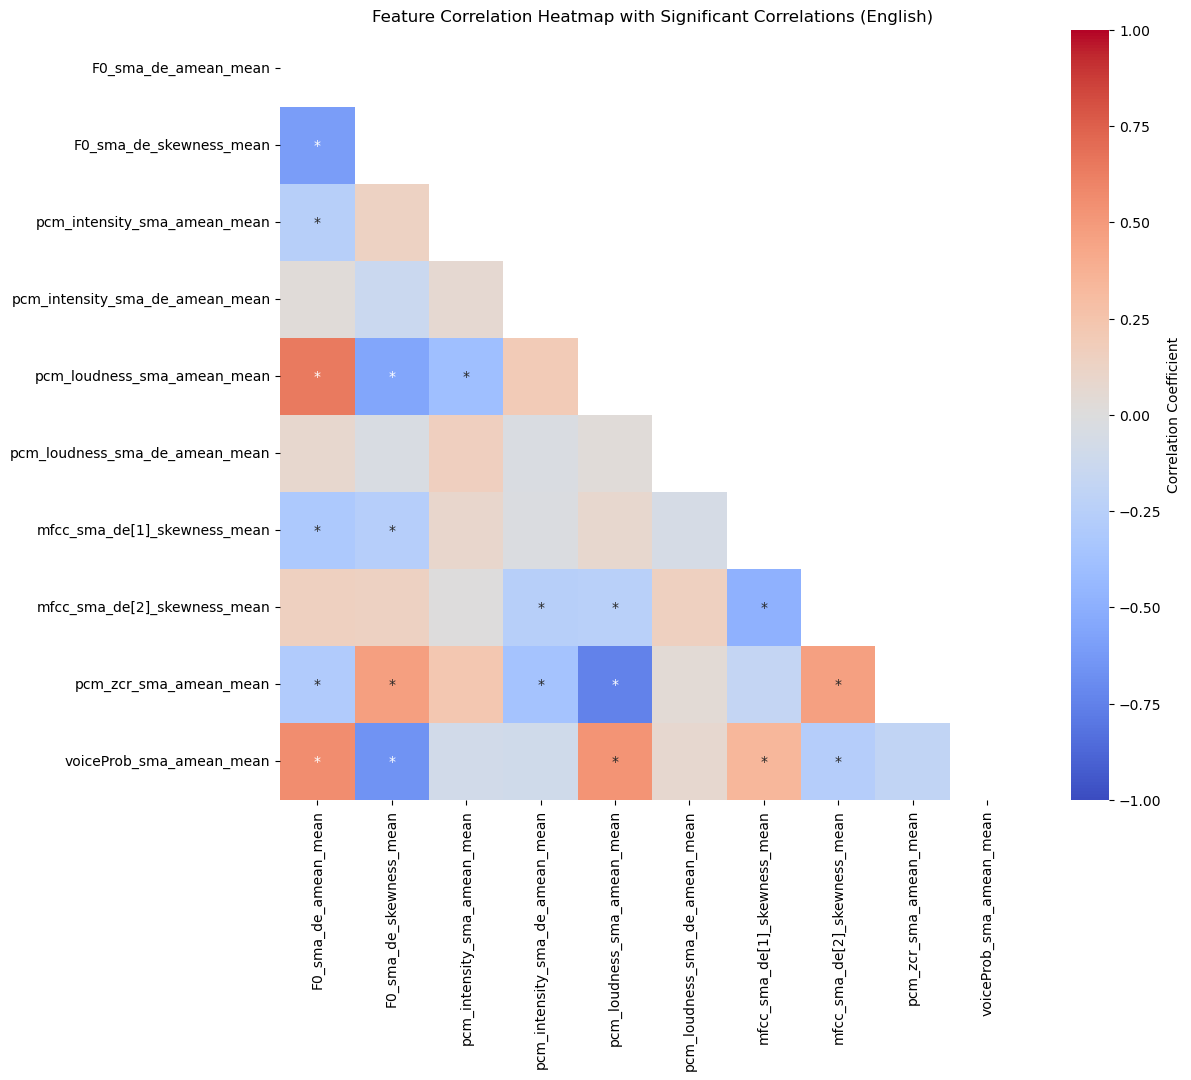

In [20]:
from scipy.stats import pearsonr
import numpy as np

# Step 1: Compute correlation and p-values
def calculate_corr_pvals(df):
    corr = df.corr()
    pvals = pd.DataFrame(np.zeros_like(corr), columns=corr.columns, index=corr.index)

    for row in corr.columns:
        for col in corr.columns:
            if row != col:
                r, p = pearsonr(df[row], df[col])
                pvals.loc[row, col] = p
            else:
                pvals.loc[row, col] = np.nan  # Diagonal
    return corr, pvals

corr_matrix, pval_matrix = calculate_corr_pvals(df_eng[numeric_cols])

# Step 2: Create significance stars
def significance_stars(pvals):
    stars = pvals.copy().astype(str)
    stars[:] = ''
    stars[pvals < 0.05] = '*'
    return stars

stars = significance_stars(pval_matrix)

# Step 3: Plot heatmap with stars
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=stars, fmt='', vmin=-1, vmax=1, center=0,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Feature Correlation Heatmap with Significant Correlations (English)")
plt.show()
